# Visão Computacional: O Guia Completo - GANs

- Adaptado de: https://www.tensorflow.org/beta/tutorials/generative/dcgan

# Importação das bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
tf.__version__

'2.6.0'

# Carregamento e pré-processamento da base de dados

In [ ]:
(X_treinamento, y_treinamento), (_,_) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_treinamento.shape

(60000, 28, 28)

In [ ]:
28 * 28

784

In [ ]:
y_treinamento.shape

(60000,)

7


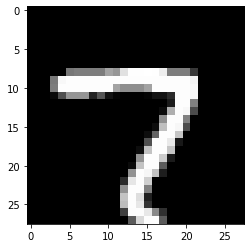

In [ ]:
i = np.random.randint(0, 60000)
print(y_treinamento[i])
plt.imshow(X_treinamento[i], cmap='gray');

In [ ]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1).astype('float32')

In [ ]:
X_treinamento.shape

(60000, 28, 28, 1)

In [ ]:
X_treinamento[0].min(), X_treinamento[0].max()

(0.0, 255.0)

In [ ]:
255 / 2

127.5

In [ ]:
# X_treinamento = X_treinamento / 255
X_treinamento = (X_treinamento - 127.5) / 127.5

In [ ]:
X_treinamento[0].min(), X_treinamento[0].max()

(-1.0, 1.0)

In [ ]:
buffer_size = 60000
batch_size = 256 # mini batch gradient descent

In [ ]:
buffer_size / batch_size

234.375

In [ ]:
type(X_treinamento)

numpy.ndarray

In [ ]:
X_treinamento = tf.data.Dataset.from_tensor_slices(X_treinamento).shuffle(buffer_size).batch(batch_size)

In [ ]:
type(X_treinamento)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
X_treinamento

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>

# Construção do gerador

- Batch normalization: https://keras.io/api/layers/normalization_layers/batch_normalization/
- Leaky Relu: https://keras.io/api/layers/activation_layers/leaky_relu/
- Funções de ativação: https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e
- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [ ]:
7*7*256

12544

In [ ]:
# 100 -> 12544
def cria_gerador():
  network = tf.keras.Sequential()

  network.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Reshape((7,7,256)))

  # 7x7x128
  network.add(layers.Conv2DTranspose(128, (5,5), padding='same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 14x14x64
  network.add(layers.Conv2DTranspose(64, (5,5), padding='same', use_bias=False, strides=(2,2)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 28x28x1
  network.add(layers.Conv2DTranspose(1, (5,5), padding='same', use_bias=False, strides=(2,2), activation='tanh'))

  network.summary()

  return network

In [ ]:
gerador = cria_gerador()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12544)             1254400   
_________________________________________________________________
batch_normalization_1 (Batch (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 128)        

In [ ]:
gerador.input

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_1_input')>

In [ ]:
ruido = tf.random.normal([1, 100])
ruido

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-0.72236425, -0.20875591, -1.3240281 , -0.06981377, -1.165264  ,
        -0.2960148 , -1.3311182 ,  1.458284  ,  1.4393326 , -2.90047   ,
        -0.35254446,  0.0083292 ,  0.14185205,  0.3663306 , -1.0829948 ,
        -1.9596651 ,  0.8537575 , -1.4138398 ,  0.9089324 , -0.03599719,
         1.0115448 , -0.32238528,  0.39215532,  0.70755434, -2.3375795 ,
        -0.34092447, -0.17054236, -0.57727927, -0.7456797 , -1.8255607 ,
        -0.91068065,  0.1793529 , -0.37648565, -0.64614016, -0.3166826 ,
        -2.1484044 , -0.14188166, -1.1440818 ,  0.787203  ,  0.09896097,
        -0.0732884 ,  1.5216819 ,  0.9951359 , -2.4180963 , -1.1160553 ,
         0.23544307,  0.47197887, -0.40108234, -1.3955429 , -1.1566288 ,
         2.8703566 , -0.46066672, -2.2054224 ,  0.521215  ,  0.83859414,
         1.3448898 , -0.41281876,  1.1074243 , -0.01907197, -0.96705174,
         1.3850862 , -0.26981753, -0.5788384 , -0.5817009 ,  0.6927593 ,
 

In [ ]:
imagem_gerada = gerador(ruido, training = False)

In [ ]:
imagem_gerada.shape

TensorShape([1, 28, 28, 1])

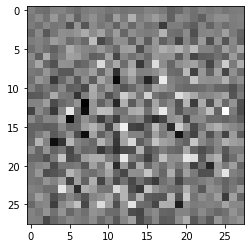

In [ ]:
plt.imshow(imagem_gerada[0, :, :, 0], cmap='gray');

# Construção do discriminador

- Dropout: http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf

In [ ]:
def cria_discriminador():
  network = tf.keras.Sequential()

  # 14x14x64
  network.add(layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=[28,28,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # 7x7x128
  network.add(layers.Conv2D(128, (5,5), strides=(2,2), padding='same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())
  network.add(layers.Dense(1))

  network.summary()
  return network

In [ ]:
7 * 7 * 128

6272

In [ ]:
discriminador = cria_discriminador()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [ ]:
discriminador.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
discriminador(imagem_gerada, training=False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00050641]], dtype=float32)>

# Cálculo do erro

- Logits: https://deepai.org/machine-learning-glossary-and-terms/logit

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminador_loss(expected_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [ ]:
def gerador_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
gerador_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
discriminador_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

# Treinamento da GAN e visualização dos resultados

In [ ]:
X_treinamento

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>

In [ ]:
epocas = 100
dimensao_ruido = 100
numero_imagens = 16

In [ ]:
batch_size, dimensao_ruido

(256, 100)

In [ ]:
@tf.function
def treinamento(imagens):
  ruido = tf.random.normal([batch_size, dimensao_ruido])
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    imagens_geradas = gerador(ruido, training=True)

    expected_output = discriminador(imagens, training=True)
    fake_output = discriminador(imagens_geradas, training=True)

    gen_loss = gerador_loss(fake_output)
    disc_loss = discriminador_loss(expected_output, fake_output)

  gradientes_gerador = gen_tape.gradient(gen_loss, gerador.trainable_variables)
  gradientes_discriminador = disc_tape.gradient(disc_loss, discriminador.trainable_variables)

  gerador_optimizer.apply_gradients(zip(gradientes_gerador, gerador.trainable_variables))
  discriminador_optimizer.apply_gradients(zip(gradientes_discriminador, discriminador.trainable_variables))

In [ ]:
imagens_teste = tf.random.normal([numero_imagens, dimensao_ruido])
imagens_teste.shape

TensorShape([16, 100])

In [ ]:
60000 / 256

234.375

In [ ]:
def treina_gan(dataset, epocas, imagens_teste):
  for epoca in range(epocas):
    for imagem_batch in dataset:
      #print(imagem_batch.shape)
      treinamento(imagem_batch)

    print('Época: ', epoca + 1)
    imagens_geradas = gerador(imagens_teste, training=False)
    fig = plt.figure(figsize=(10,10))
    for i in range(imagens_geradas.shape[0]):
      plt.subplot(4,4,i+1)
      plt.imshow(imagens_geradas[i, :,:,0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
    plt.show()

Época:  1


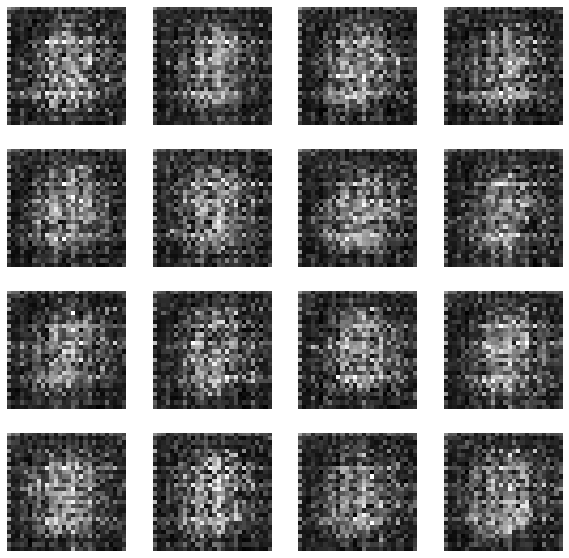

Época:  2


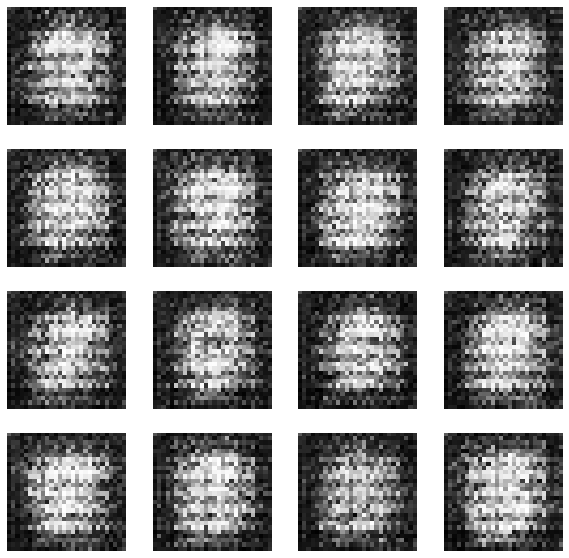

Época:  3


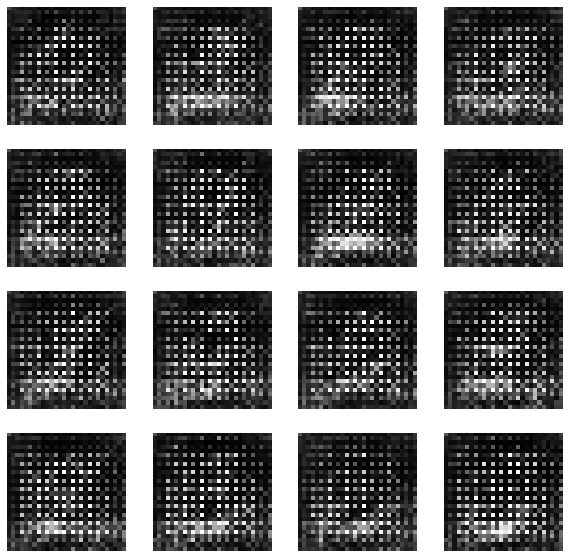

Época:  4


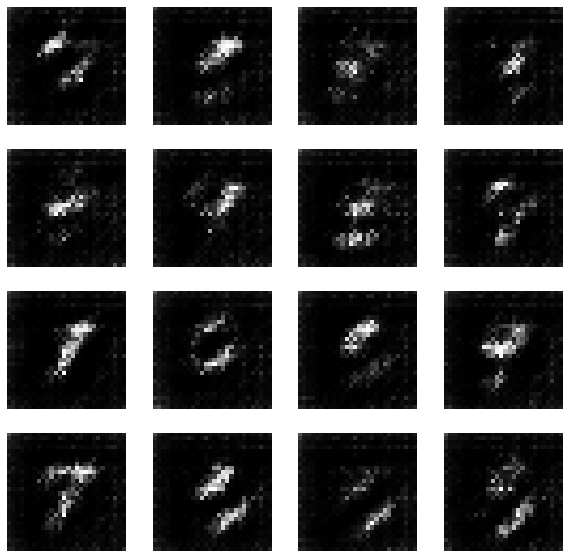

Época:  5


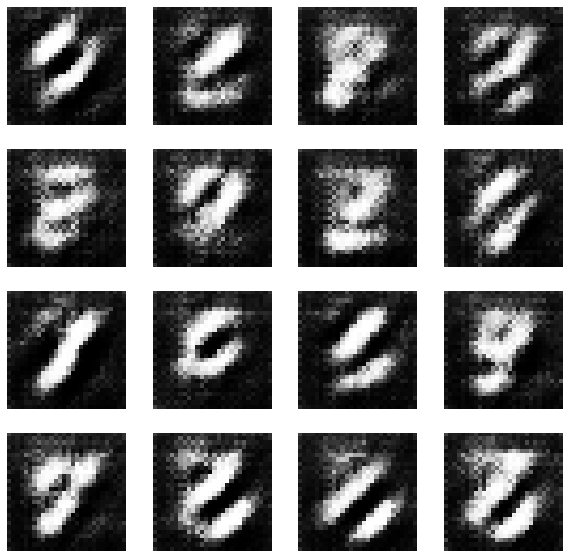

Época:  6


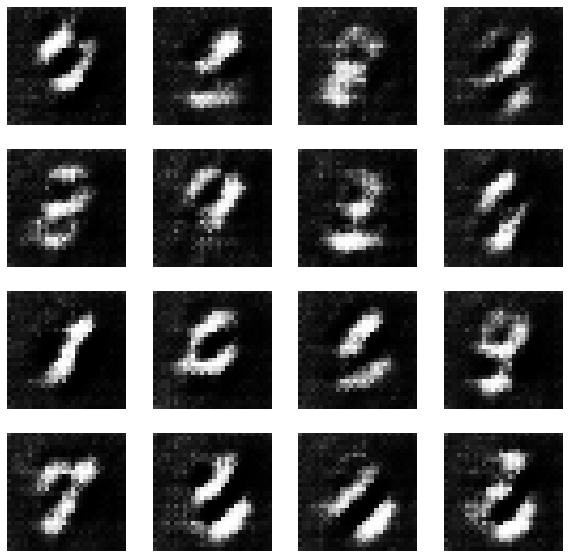

Época:  7


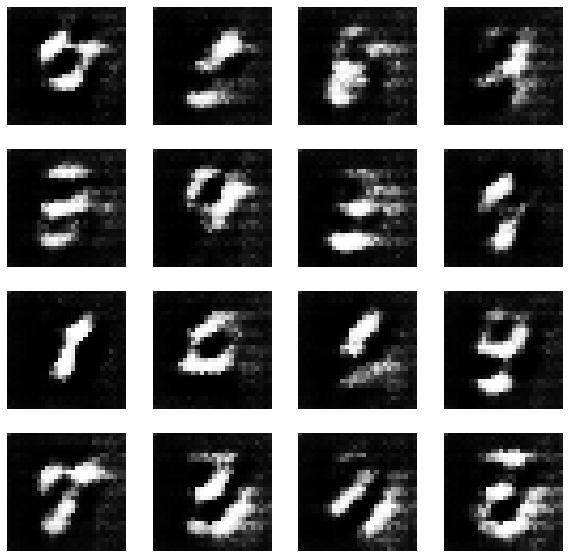

Época:  8


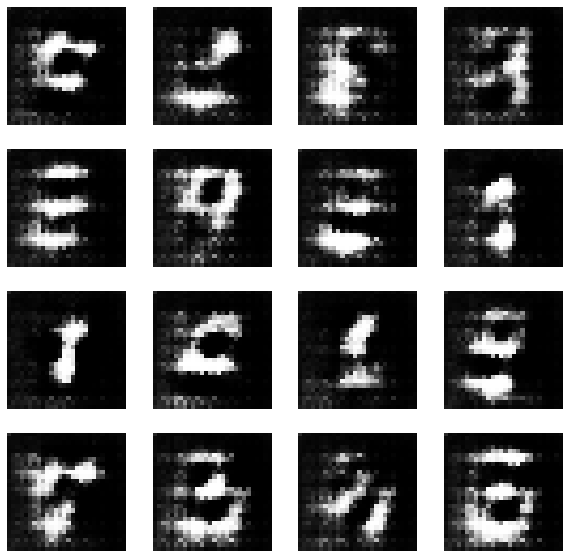

Época:  9


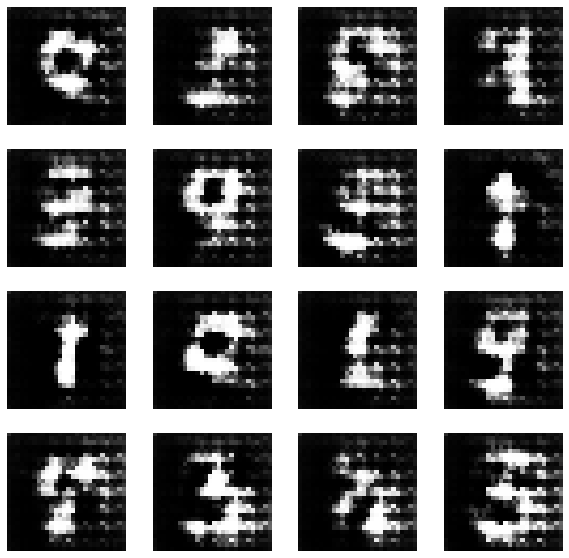

Época:  10


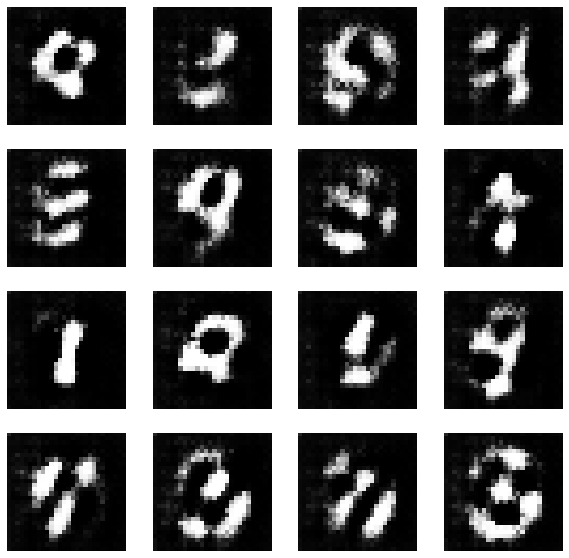

Época:  11


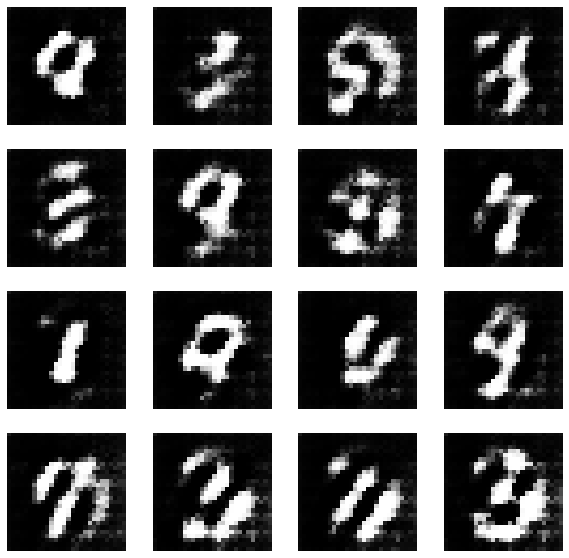

Época:  12


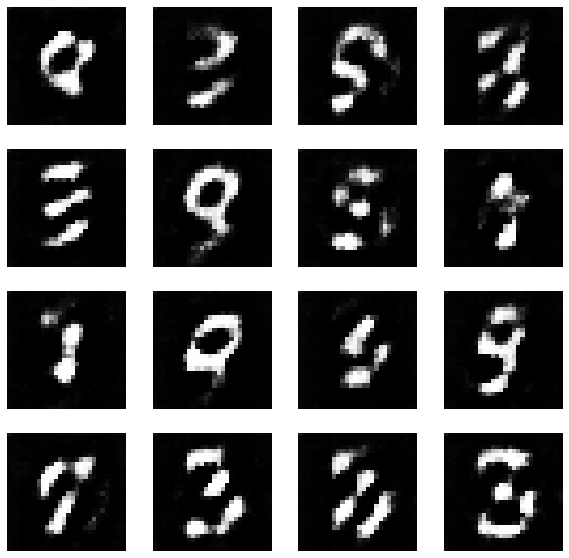

Época:  13


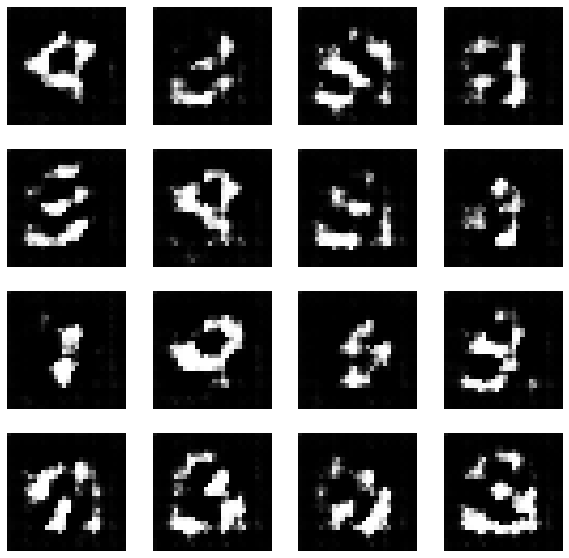

Época:  14


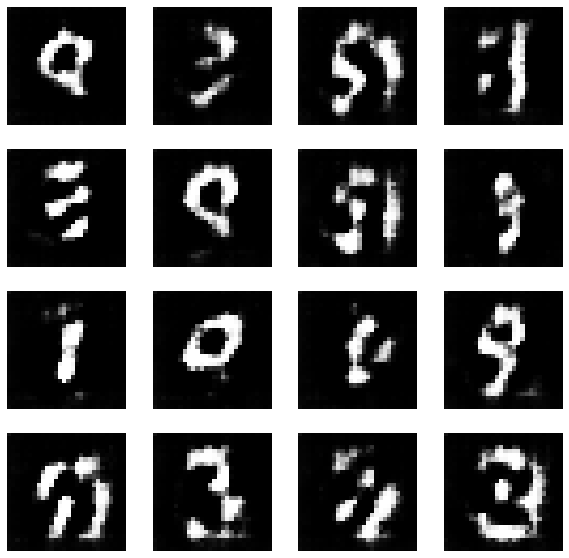

Época:  15


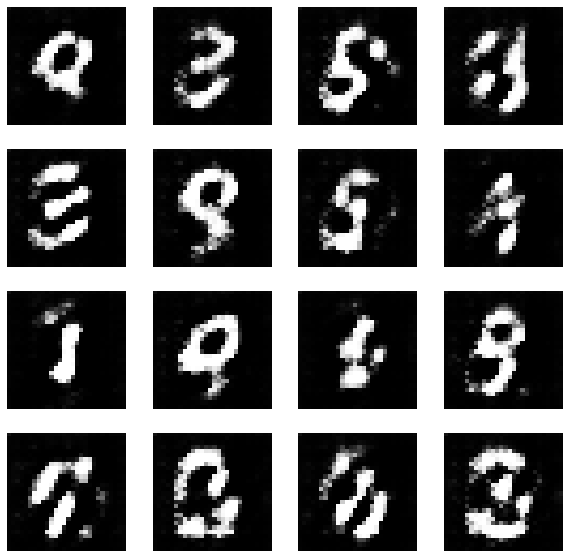

Época:  16


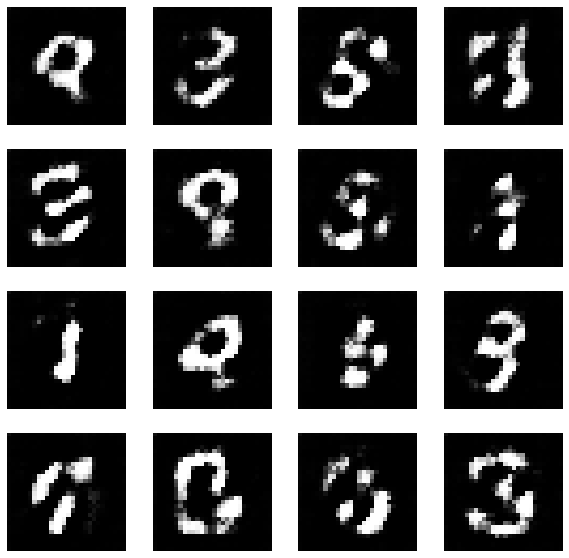

Época:  17


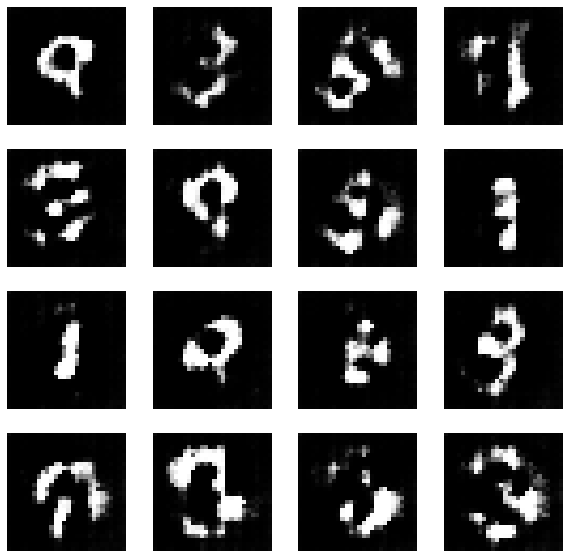

Época:  18


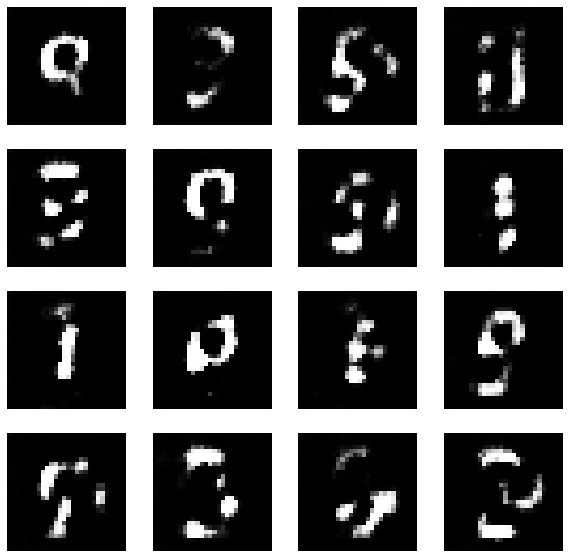

Época:  19


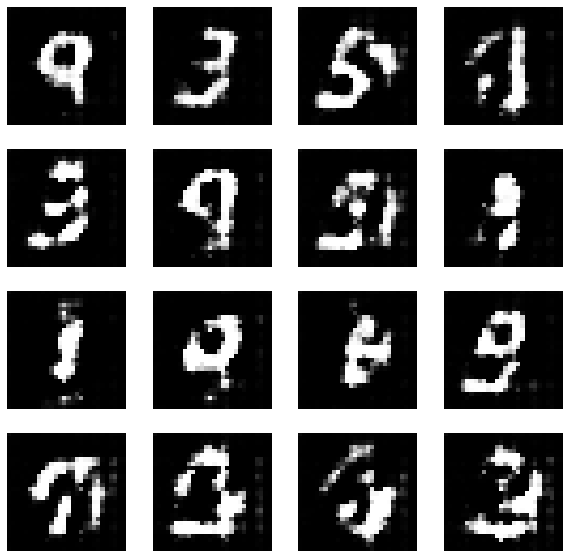

Época:  20


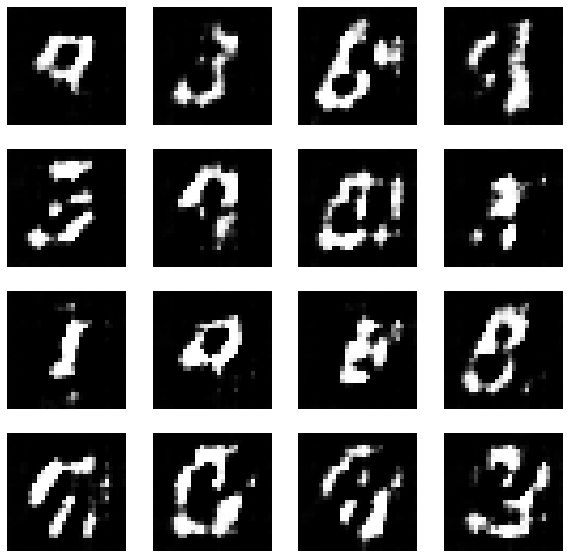

Época:  21


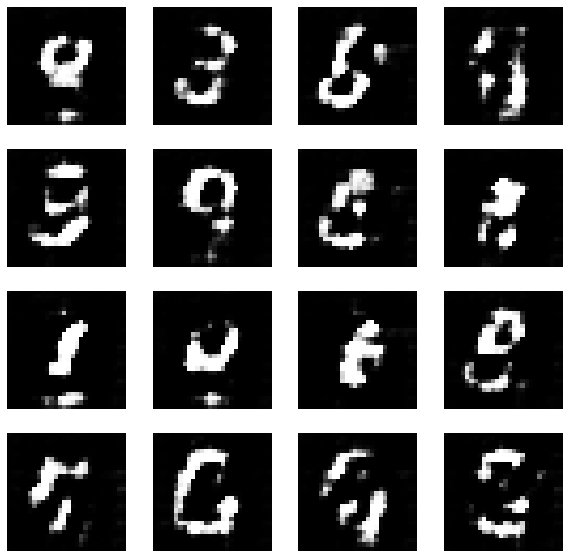

Época:  22


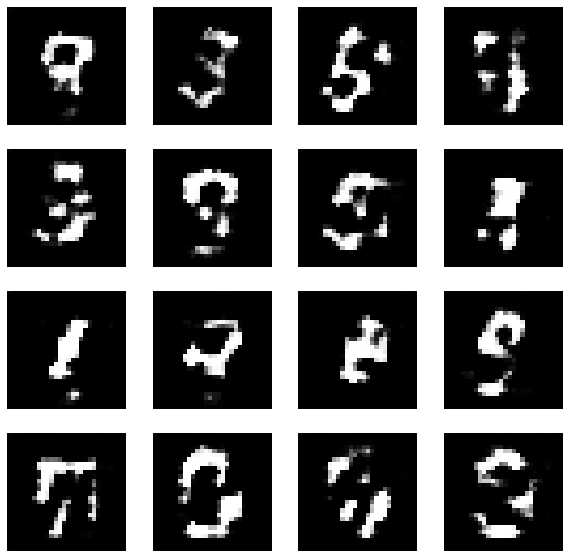

Época:  23


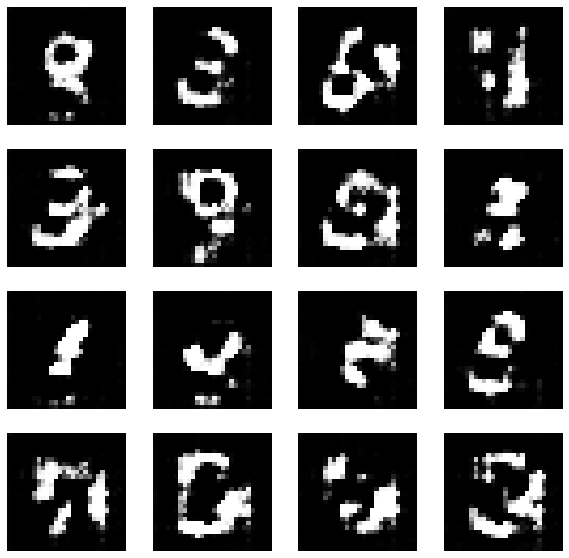

Época:  24


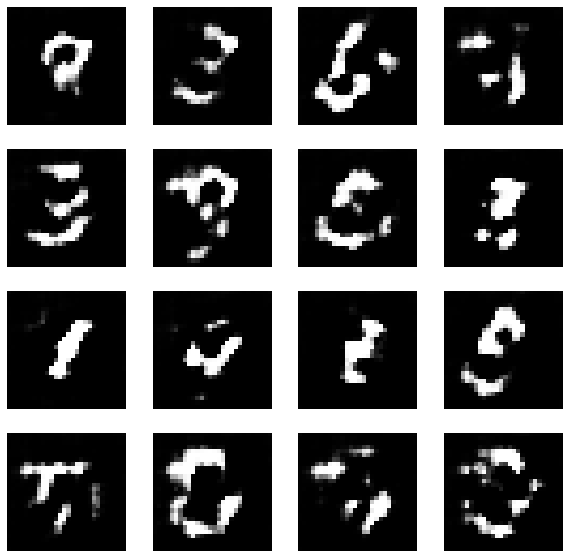

Época:  25


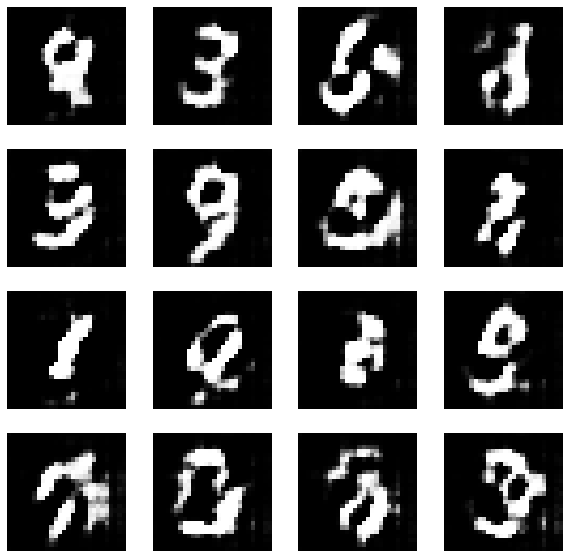

Época:  26


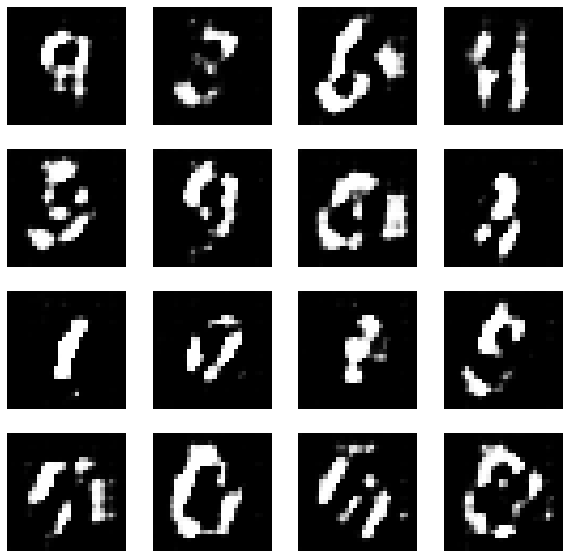

Época:  27


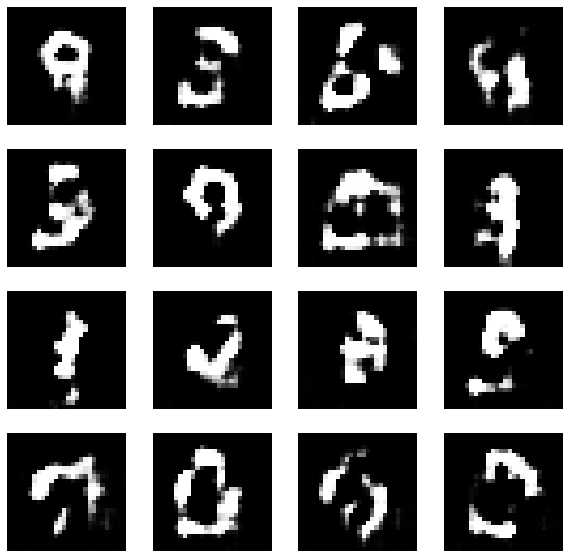

Época:  28


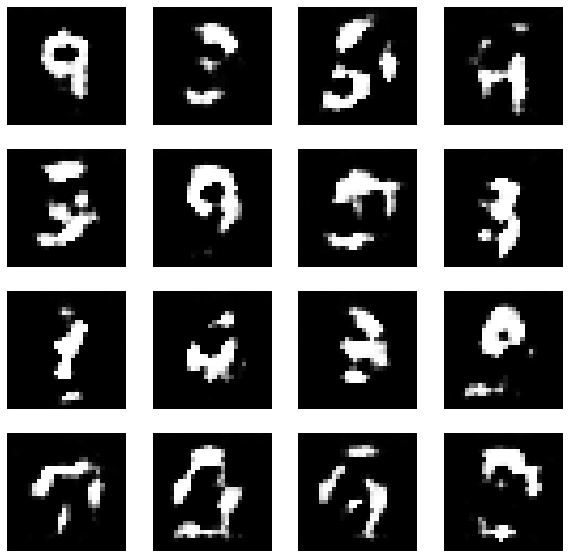

Época:  29


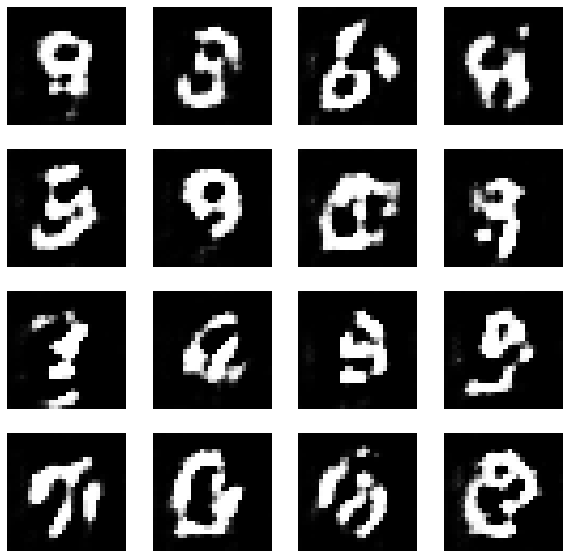

Época:  30


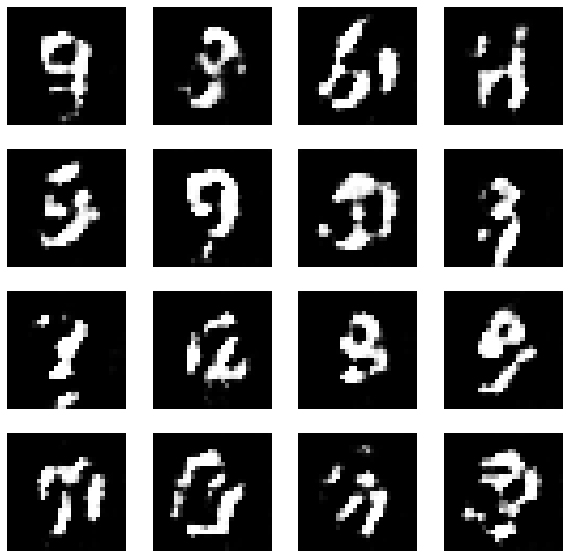

Época:  31


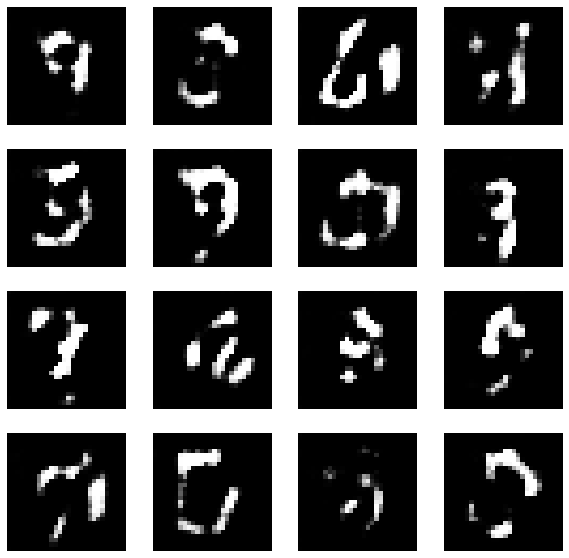

Época:  32


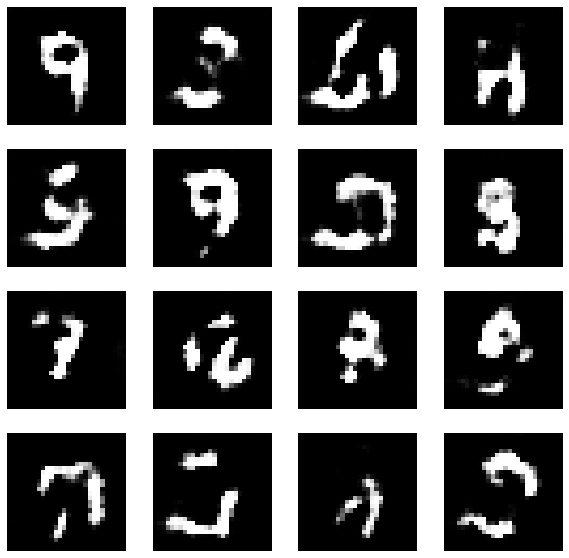

Época:  33


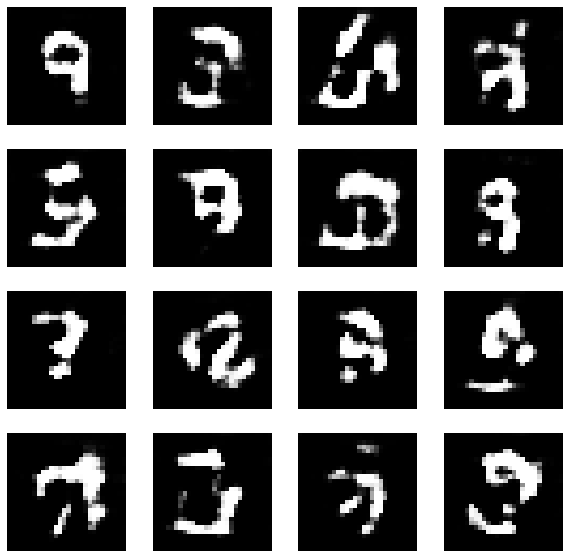

Época:  34


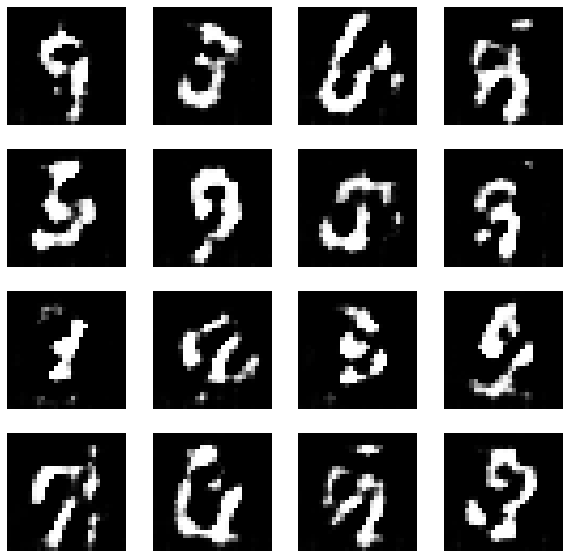

Época:  35


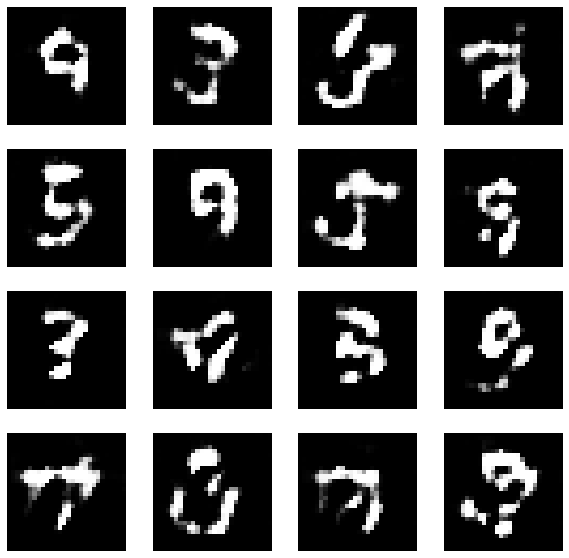

Época:  36


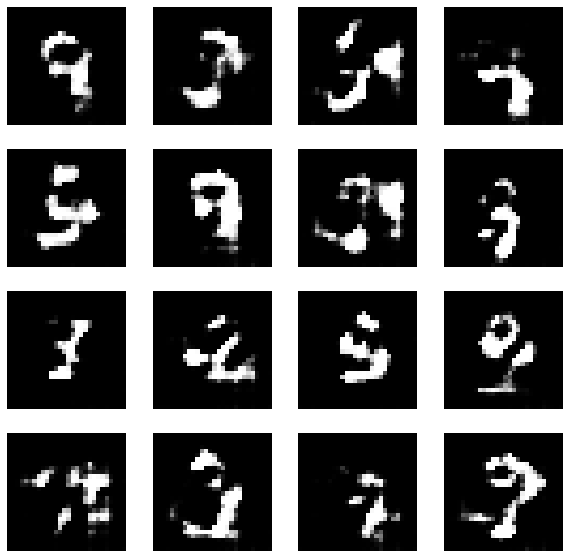

Época:  37


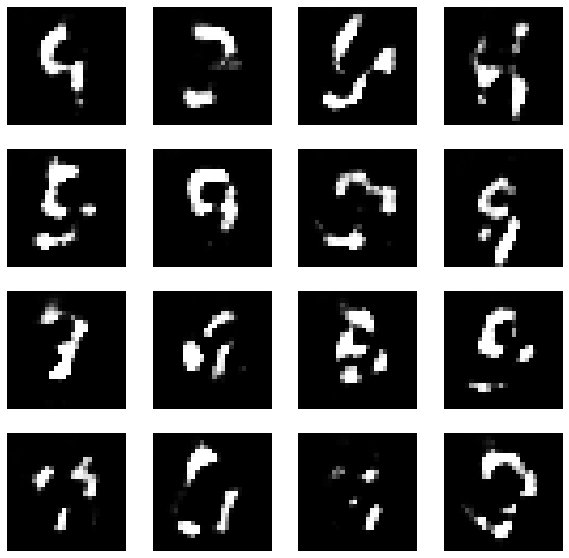

Época:  38


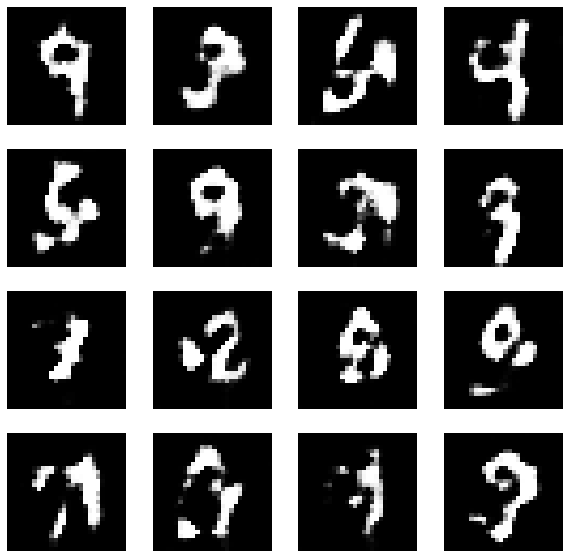

Época:  39


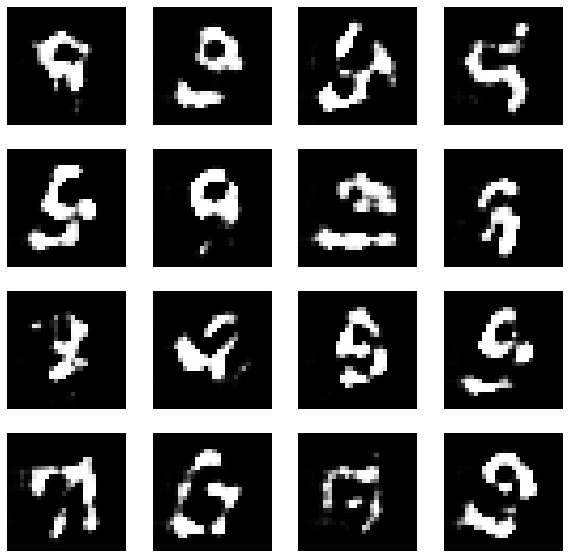

Época:  40


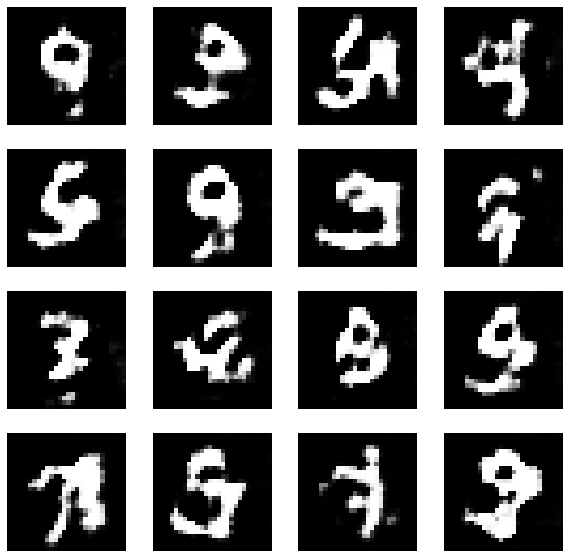

Época:  41


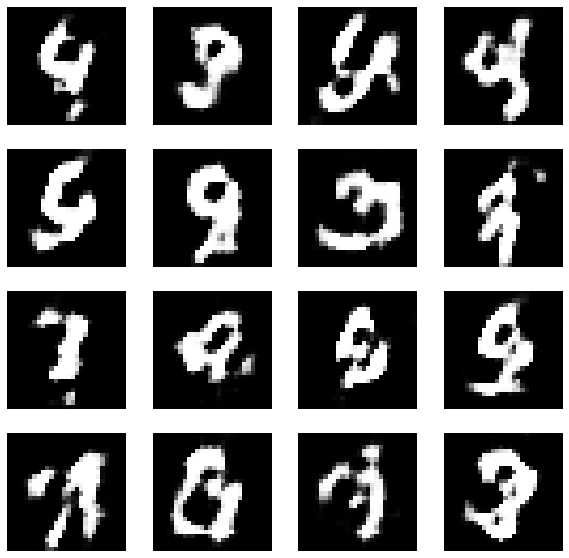

Época:  42


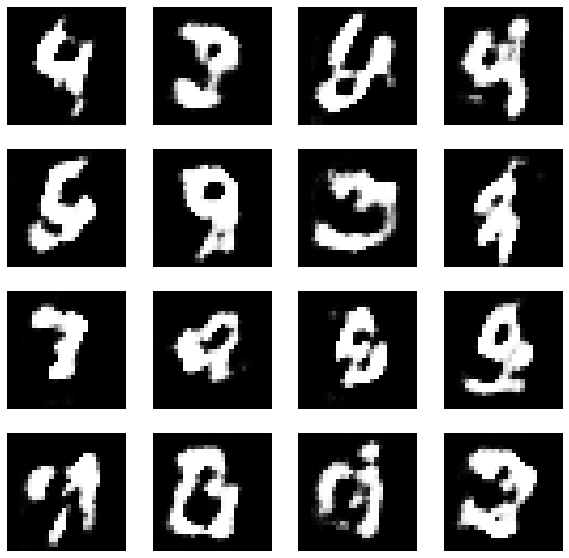

Época:  43


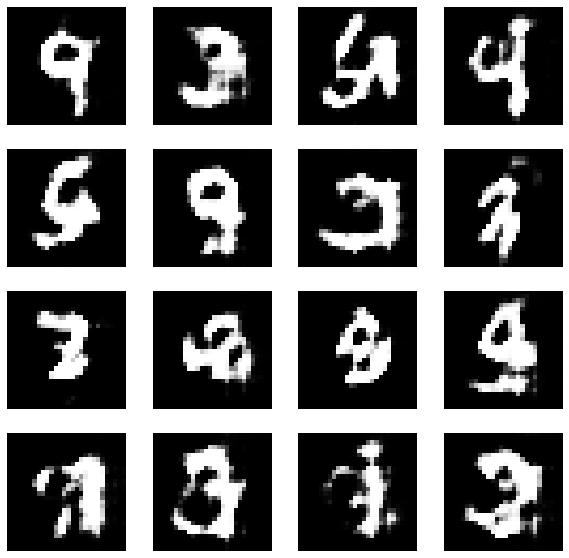

Época:  44


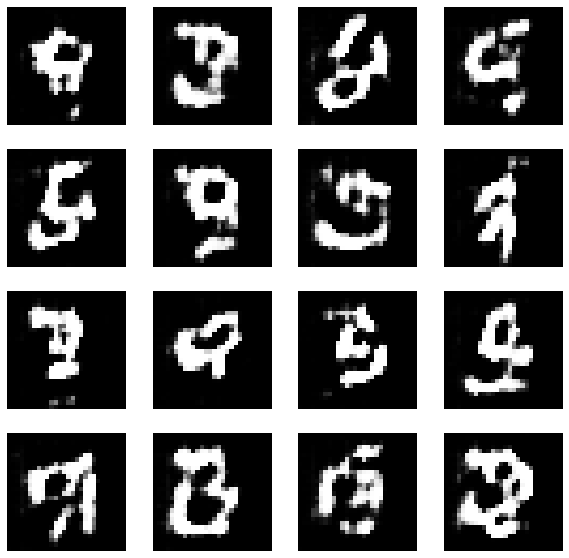

Época:  45


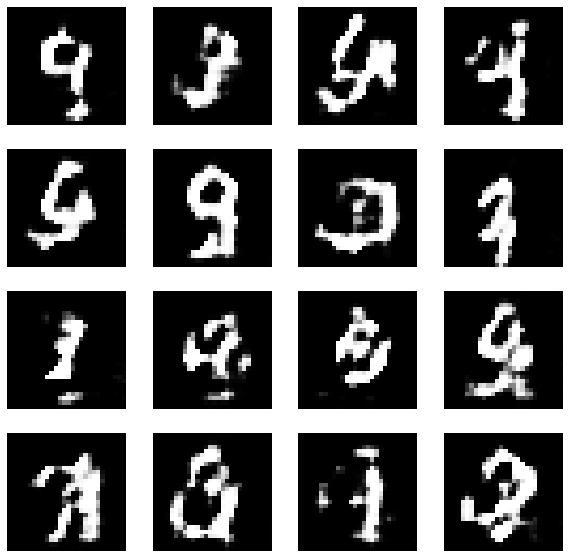

Época:  46


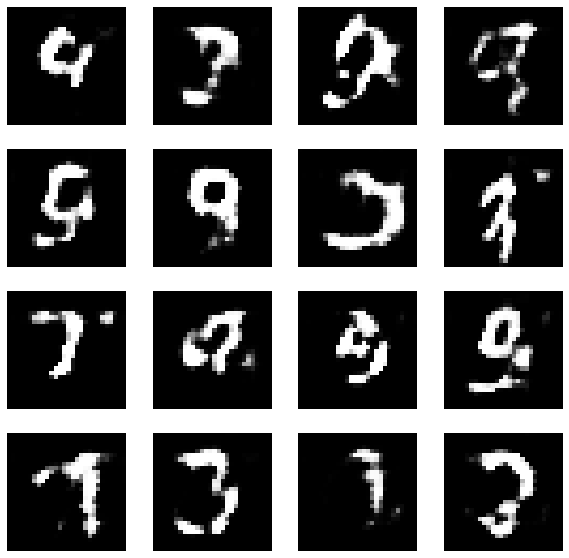

Época:  47


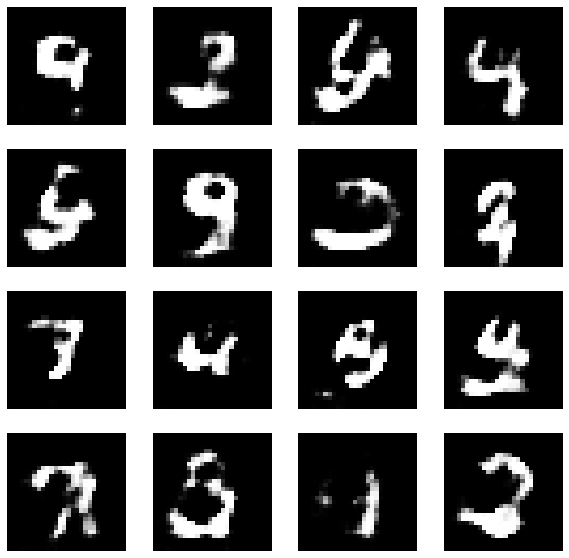

Época:  48


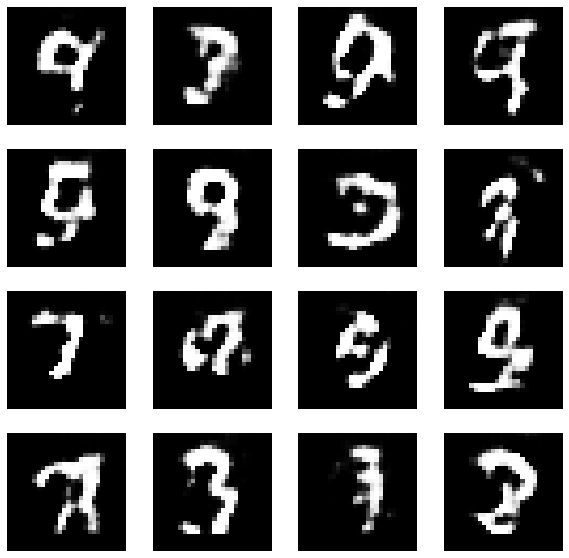

Época:  49


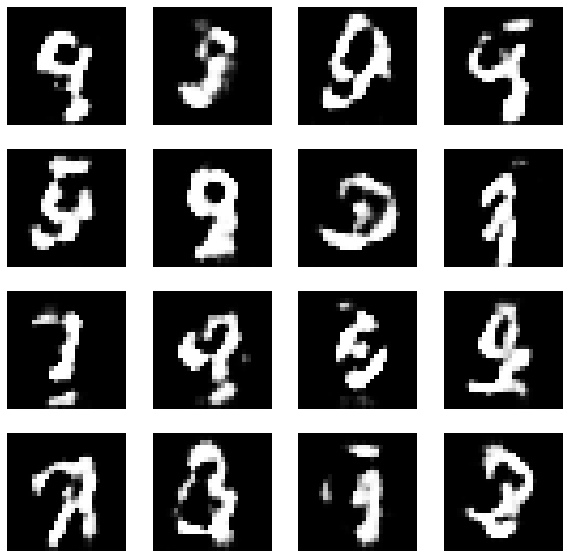

Época:  50


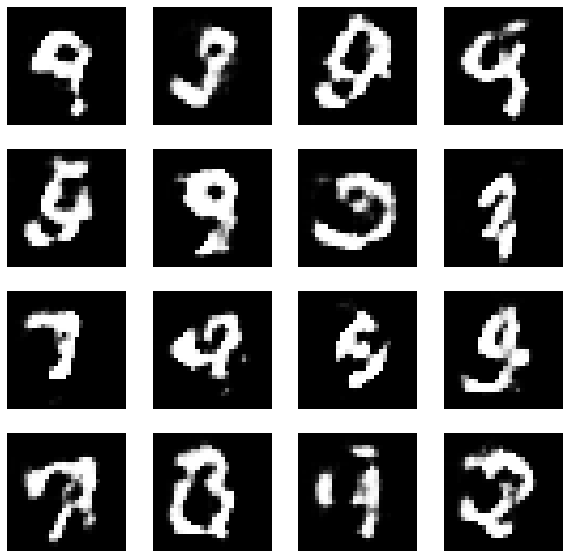

Época:  51


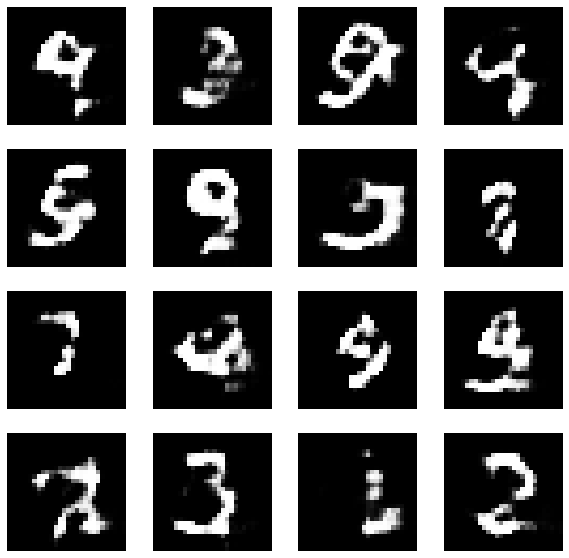

Época:  52


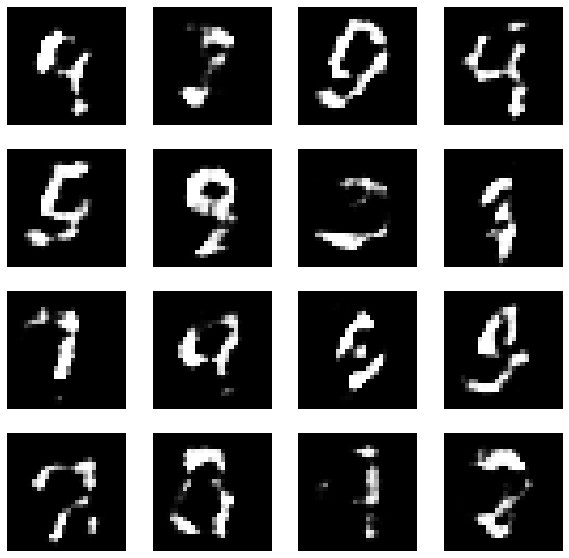

Época:  53


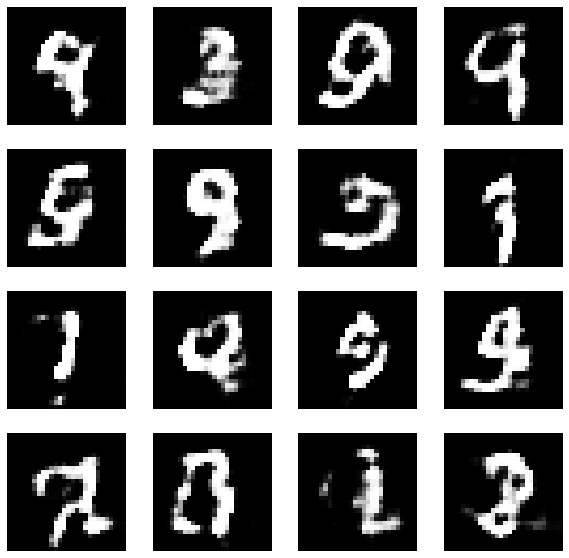

Época:  54


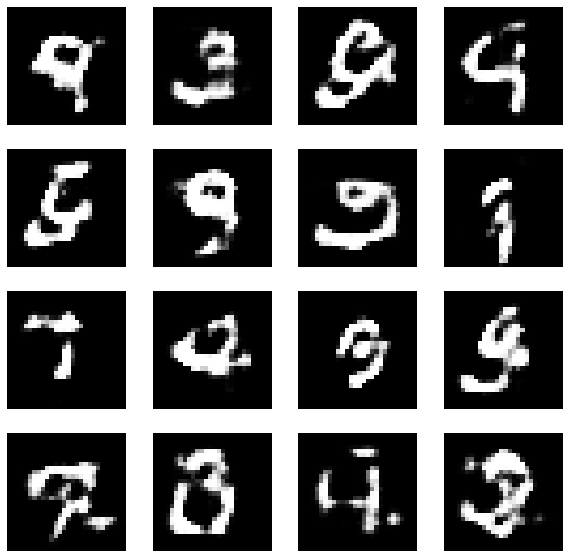

Época:  55


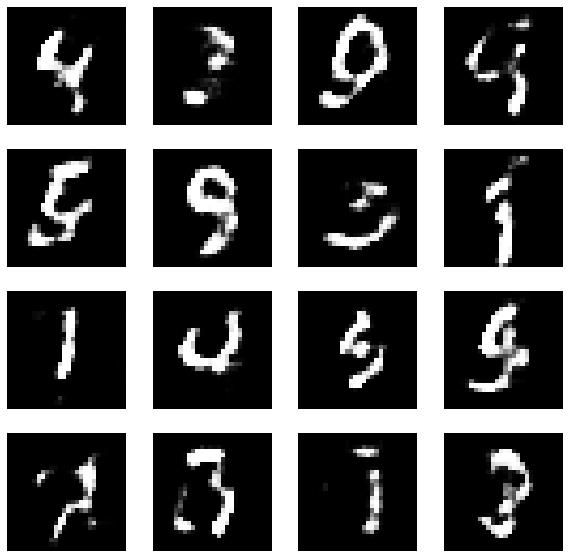

Época:  56


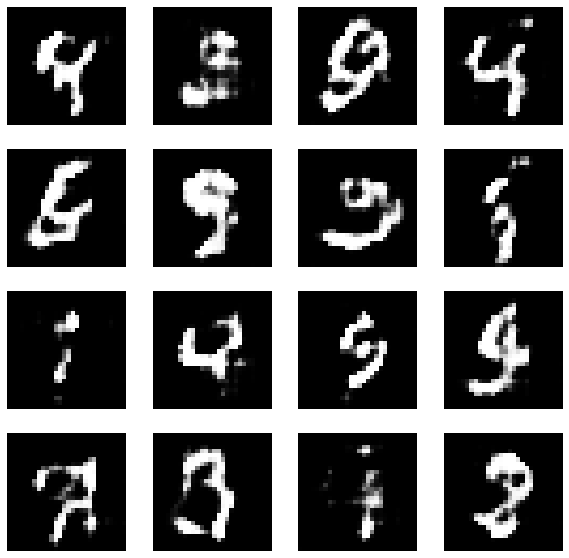

Época:  57


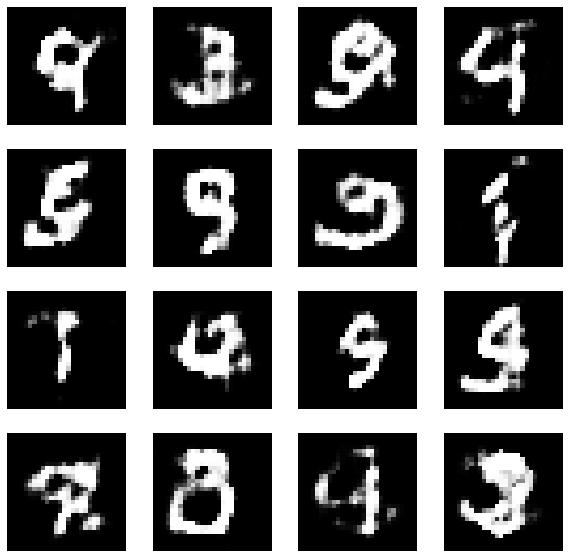

Época:  58


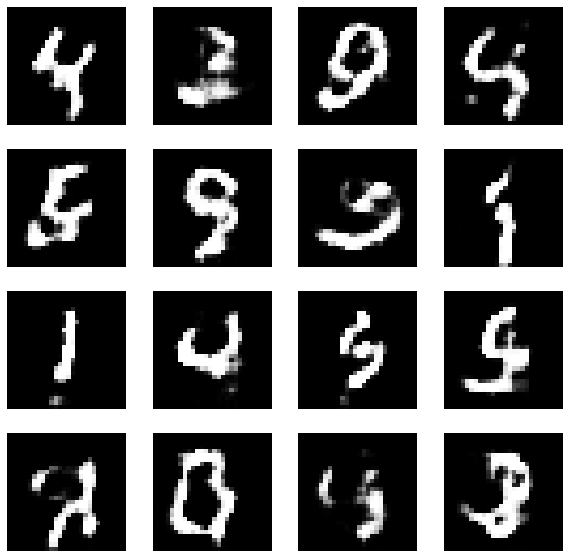

Época:  59


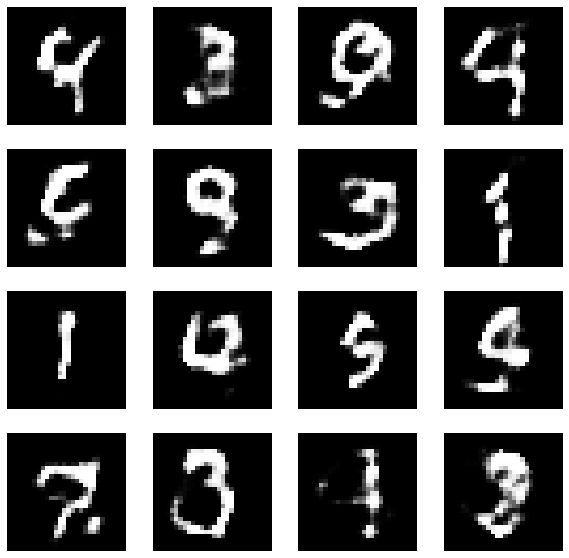

Época:  60


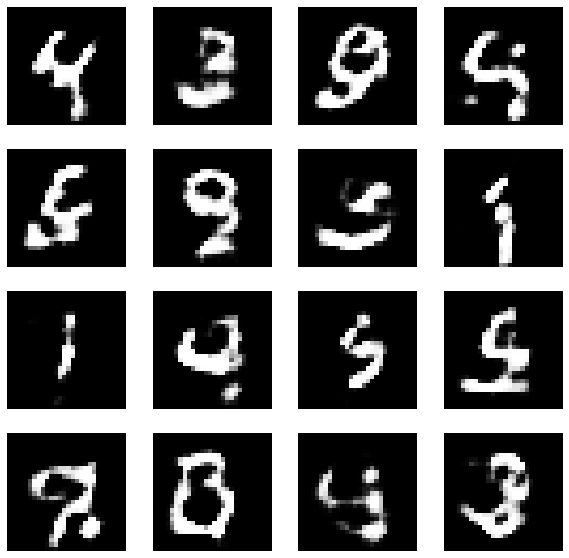

Época:  61


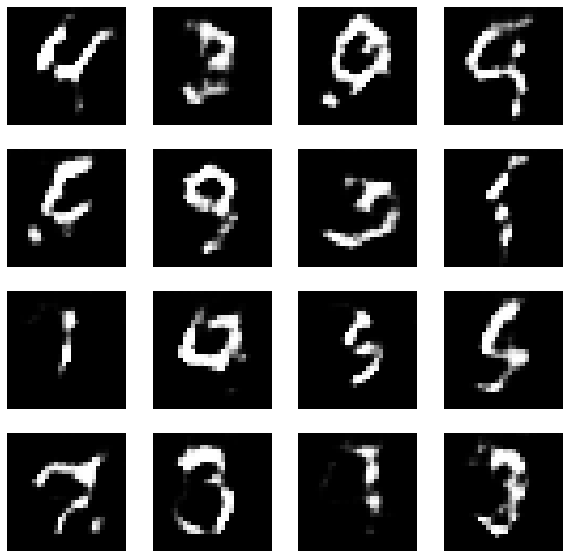

Época:  62


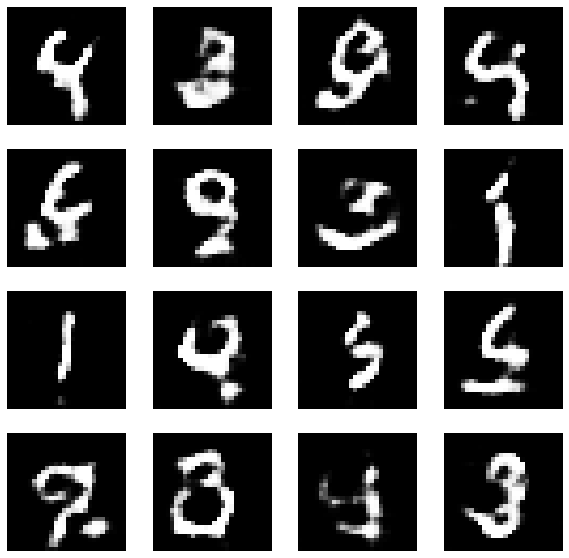

Época:  63


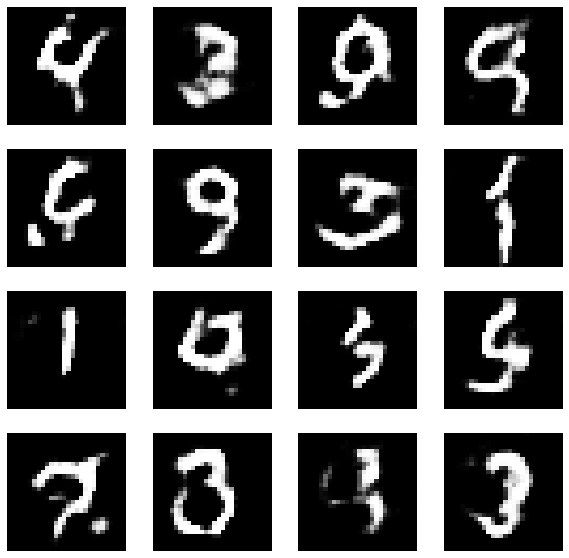

Época:  64


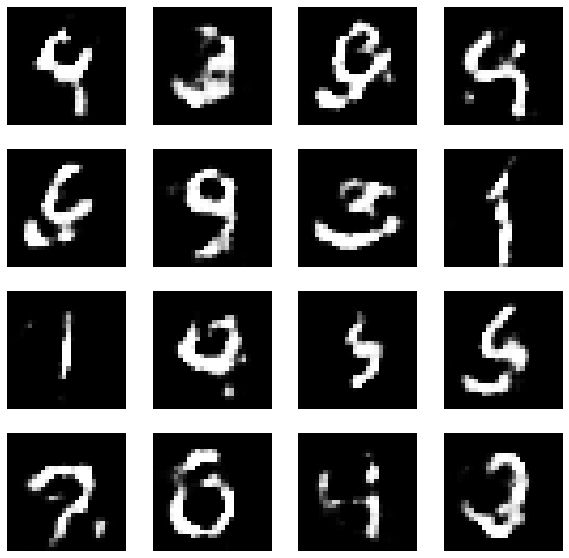

Época:  65


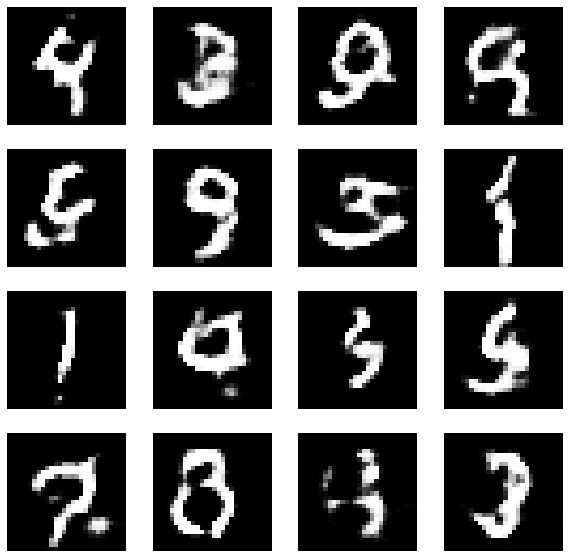

Época:  66


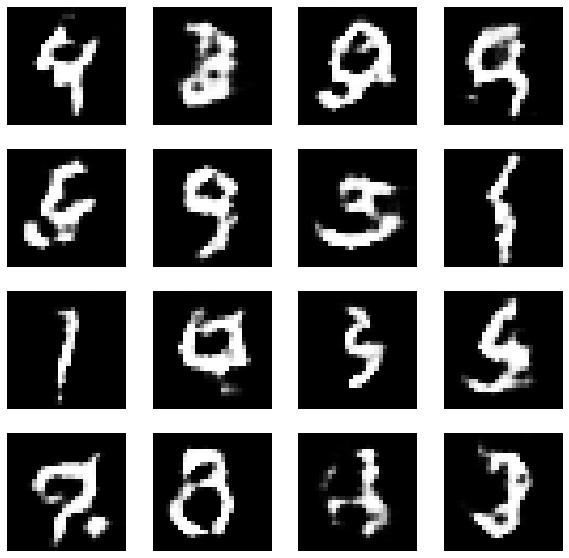

Época:  67


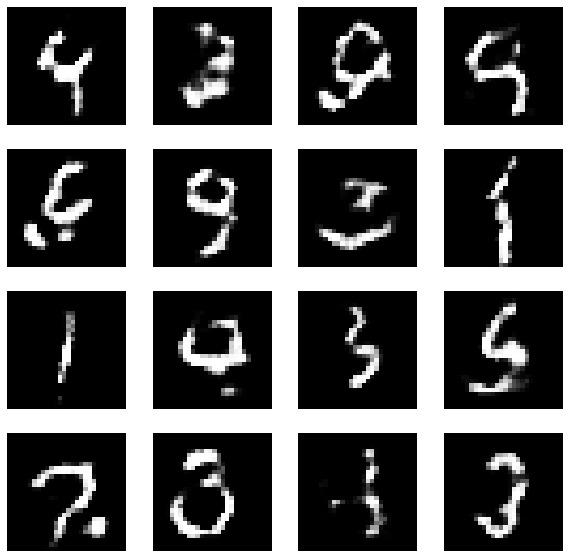

Época:  68


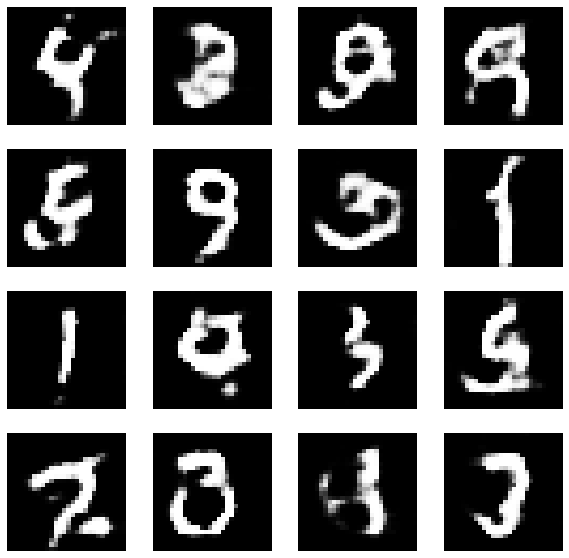

Época:  69


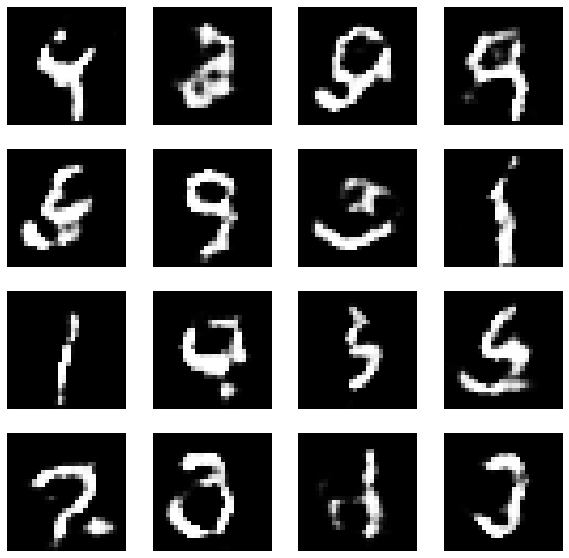

Época:  70


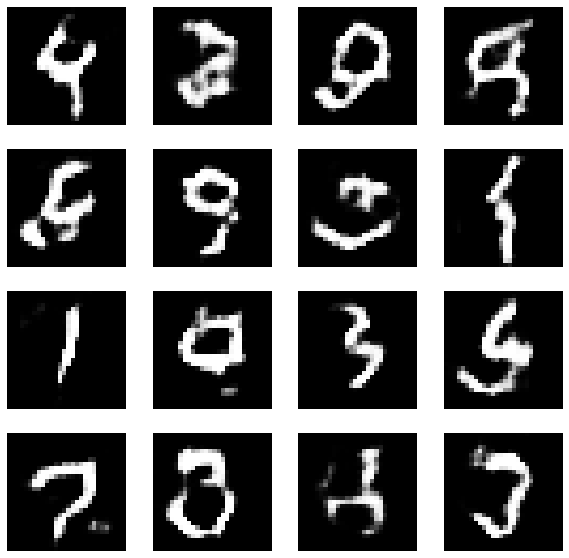

Época:  71


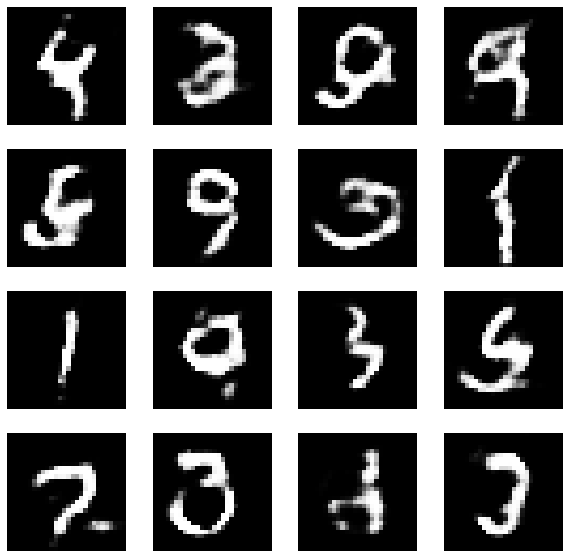

Época:  72


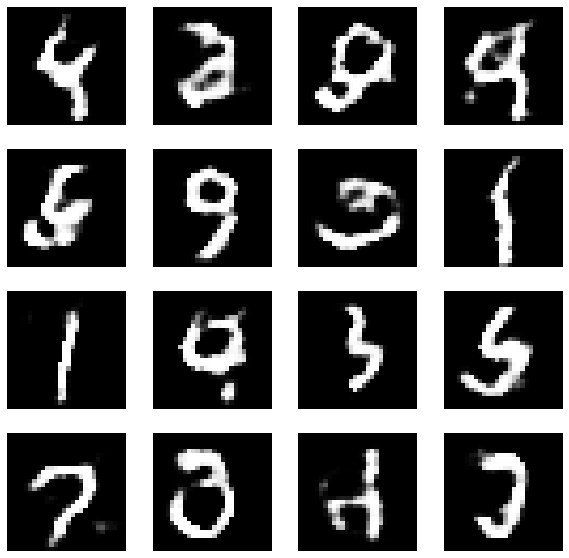

Época:  73


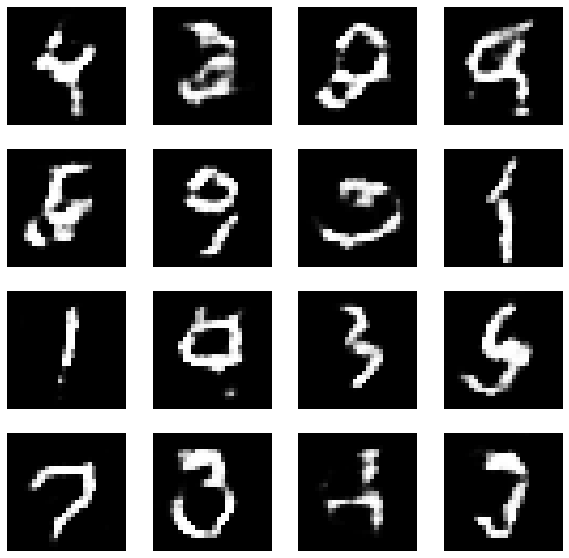

Época:  74


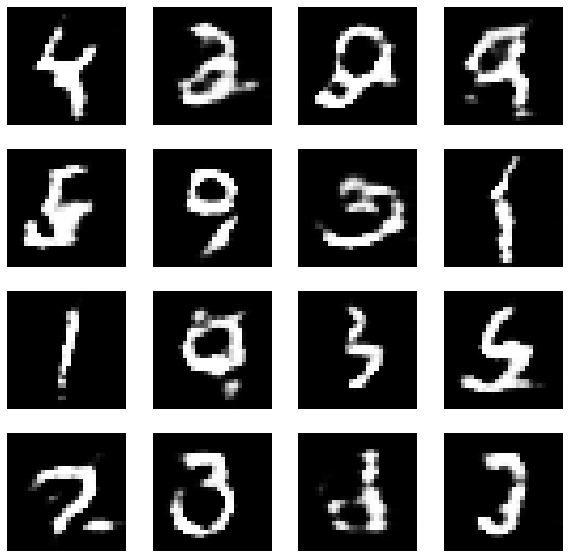

Época:  75


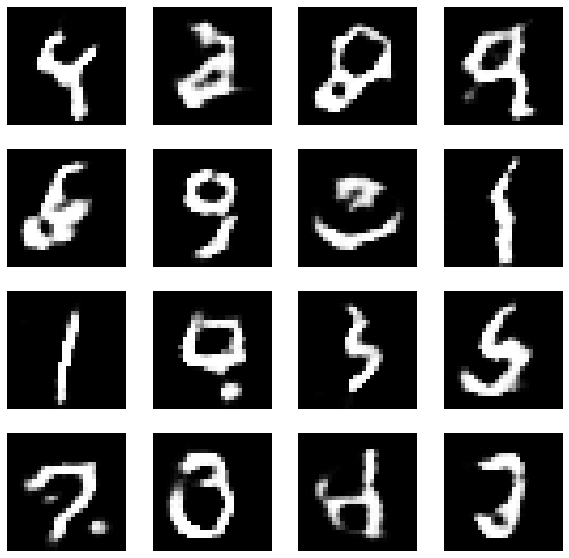

Época:  76


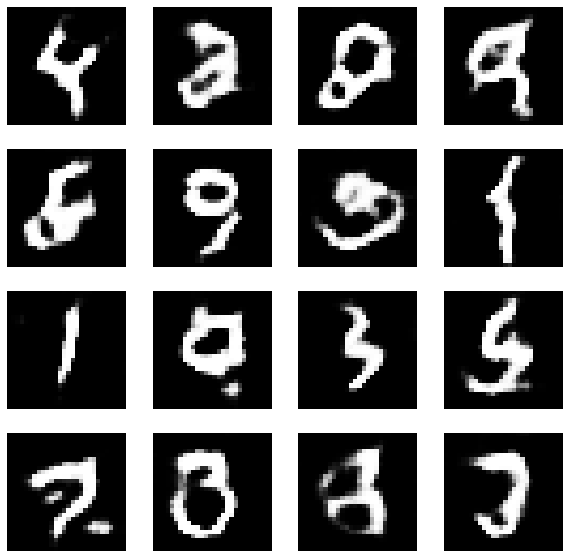

Época:  77


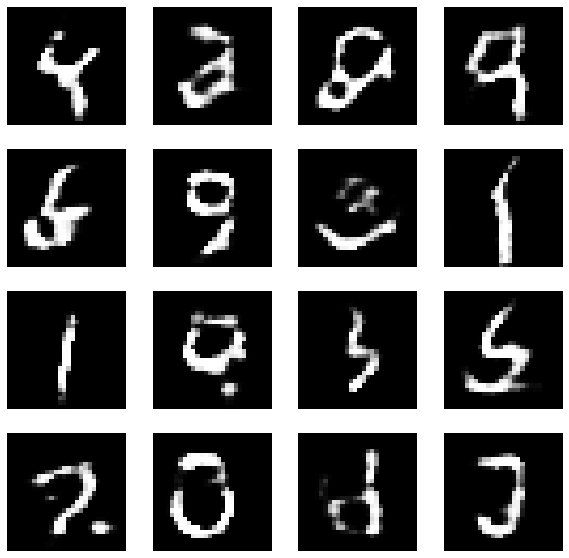

Época:  78


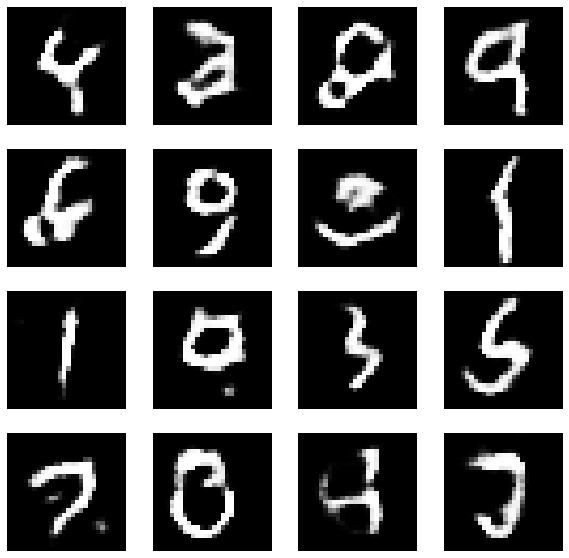

Época:  79


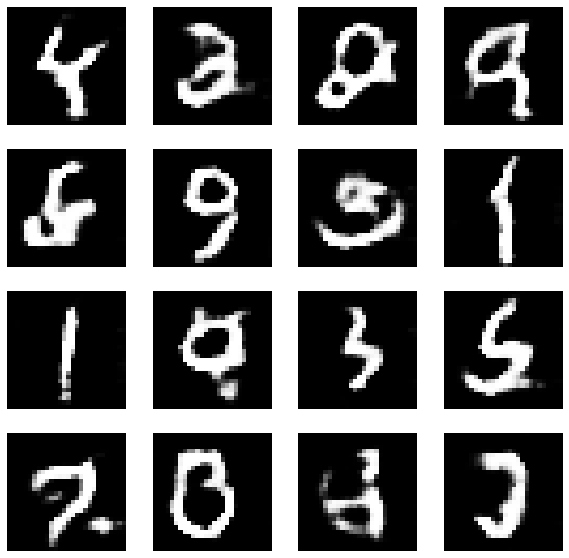

Época:  80


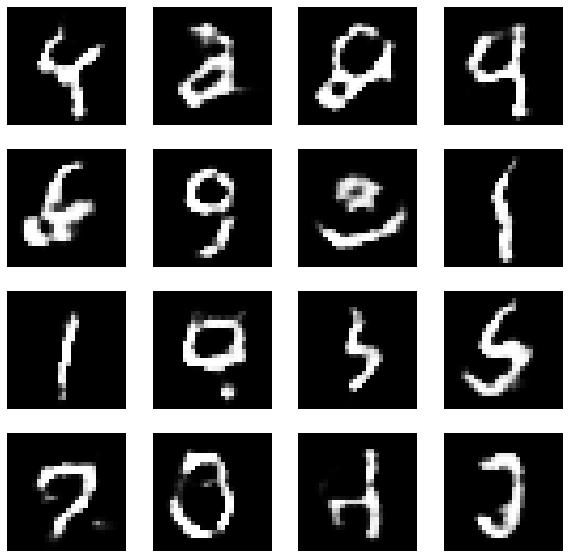

Época:  81


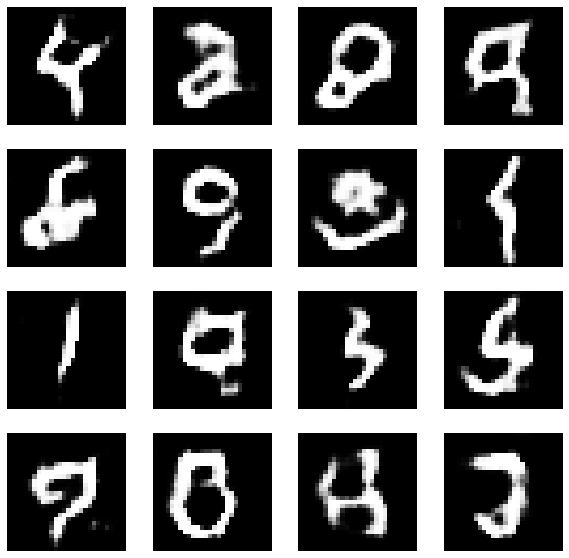

Época:  82


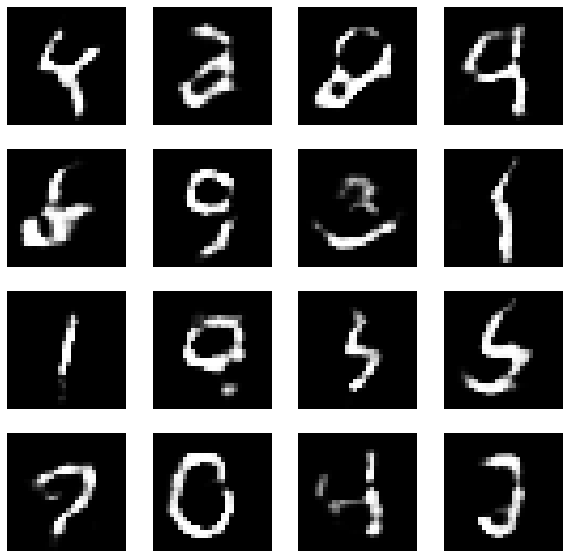

Época:  83


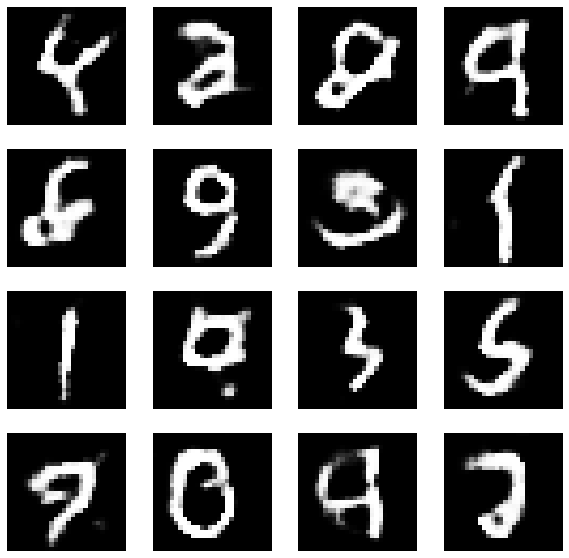

Época:  84


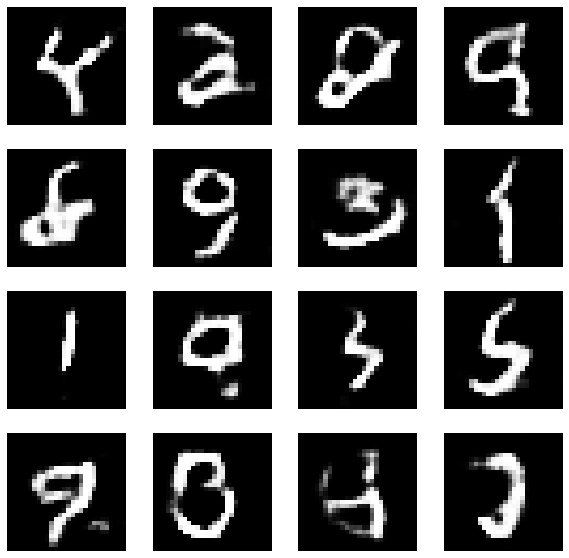

Época:  85


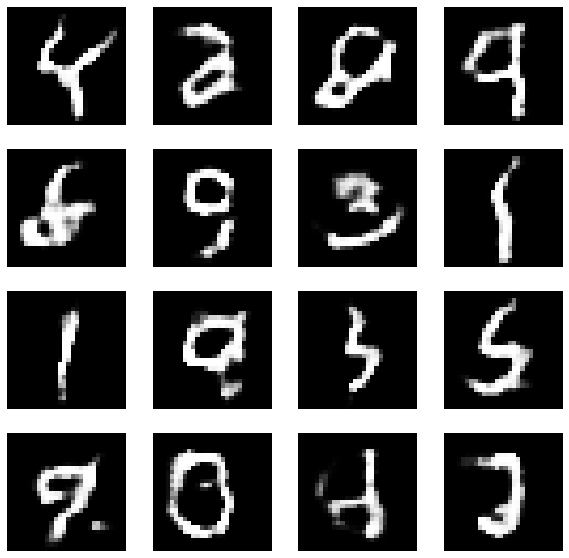

Época:  86


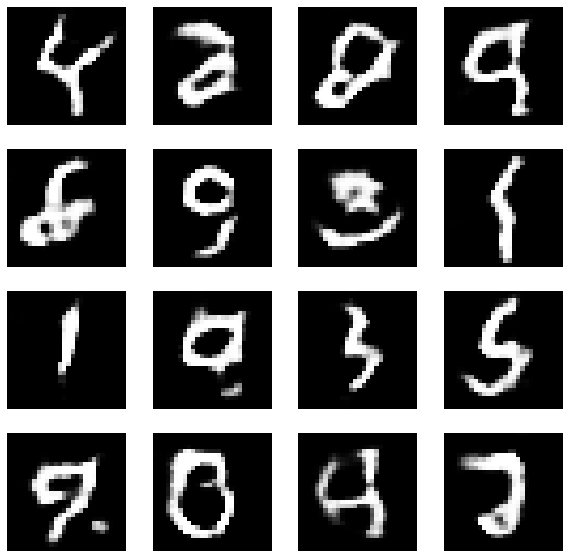

Época:  87


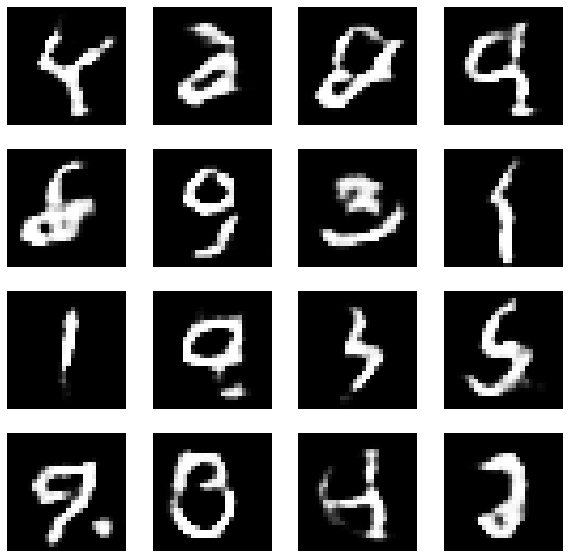

Época:  88


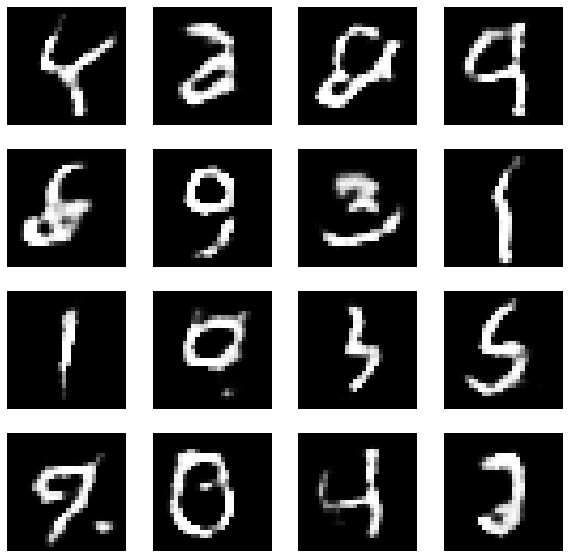

Época:  89


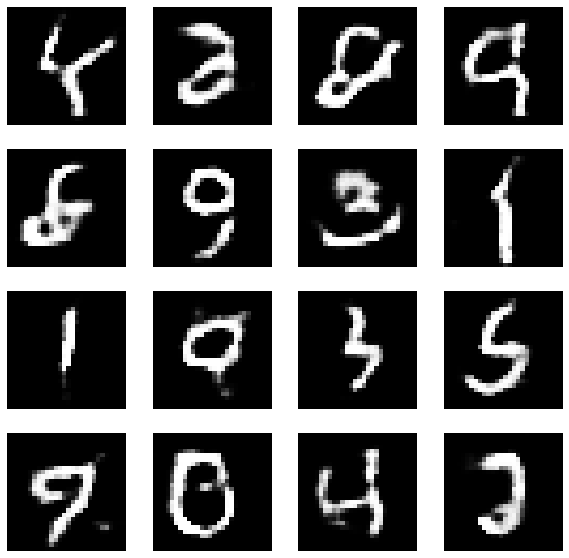

Época:  90


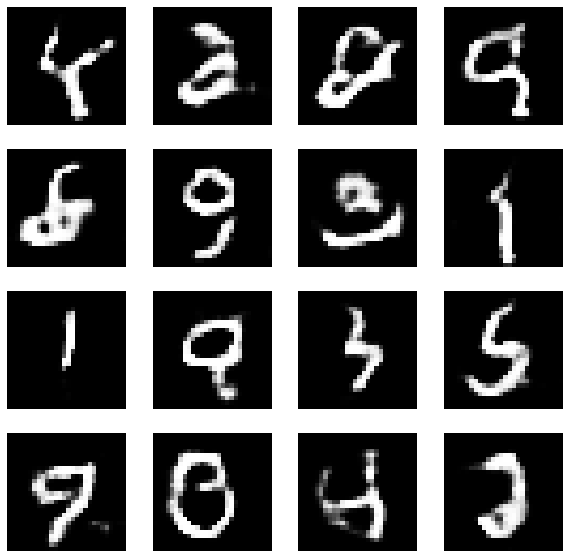

Época:  91


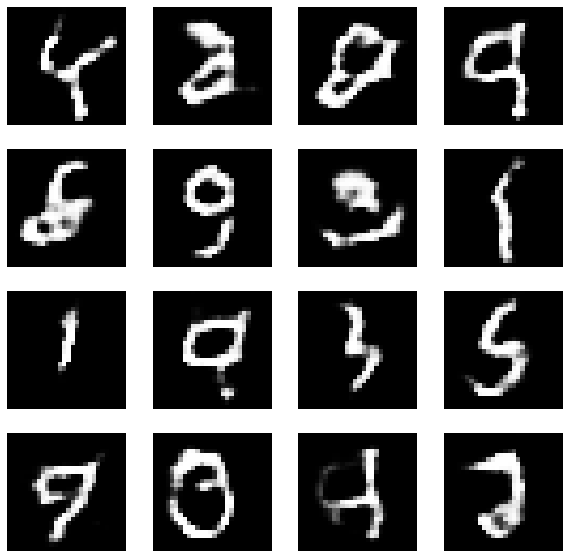

Época:  92


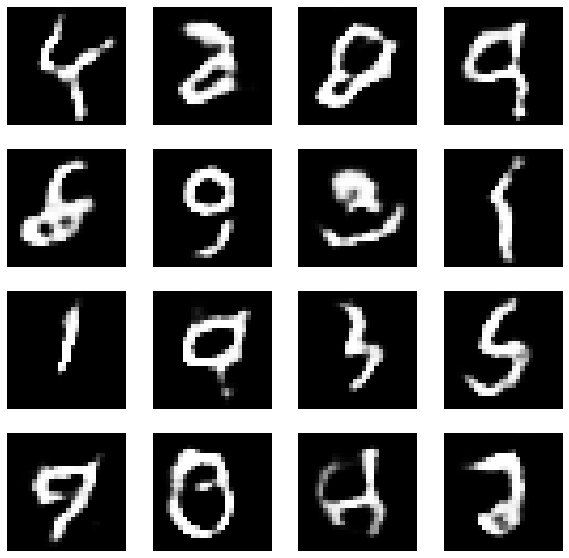

Época:  93


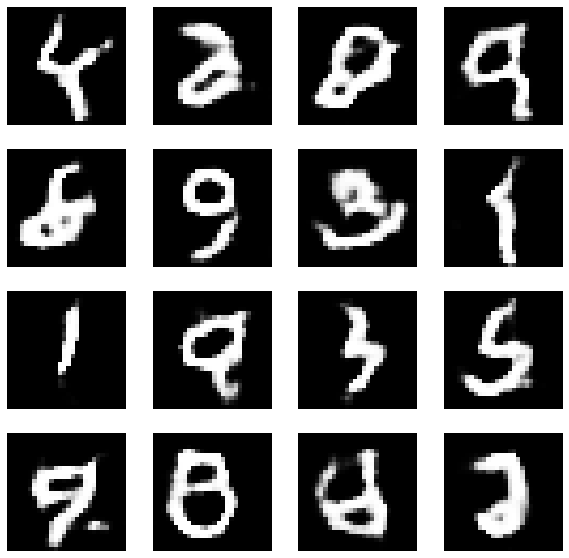

Época:  94


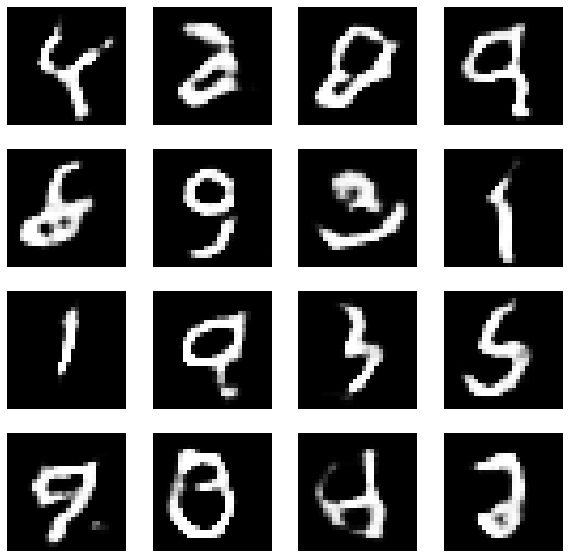

Época:  95


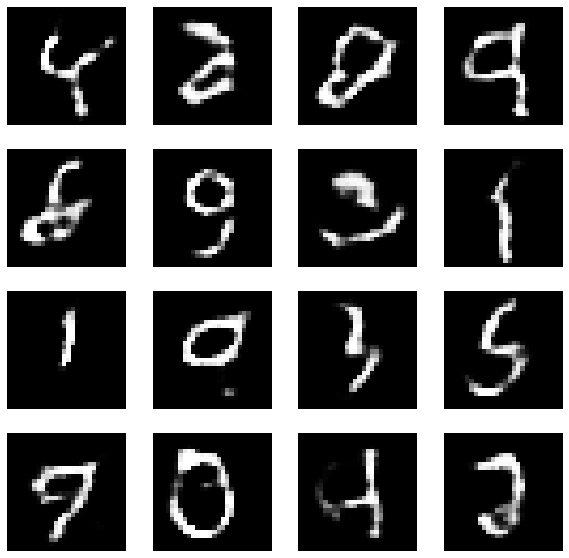

Época:  96


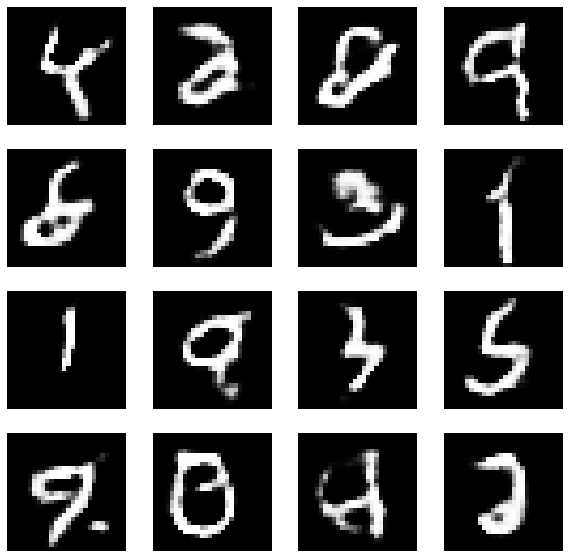

Época:  97


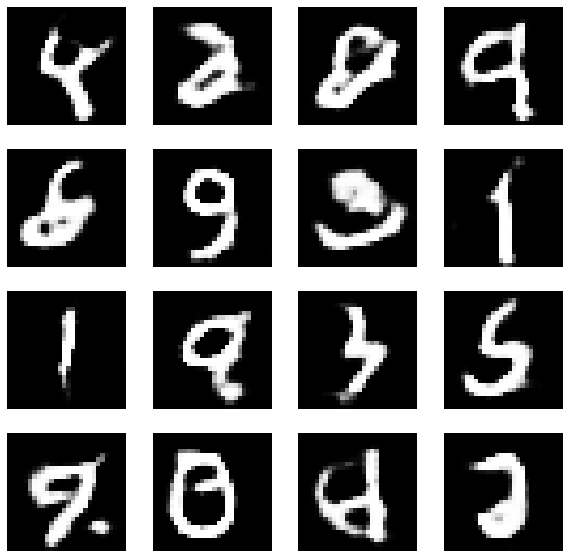

Época:  98


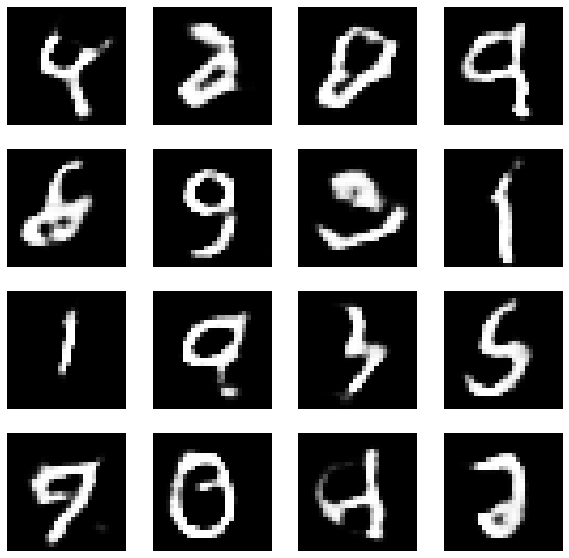

Época:  99


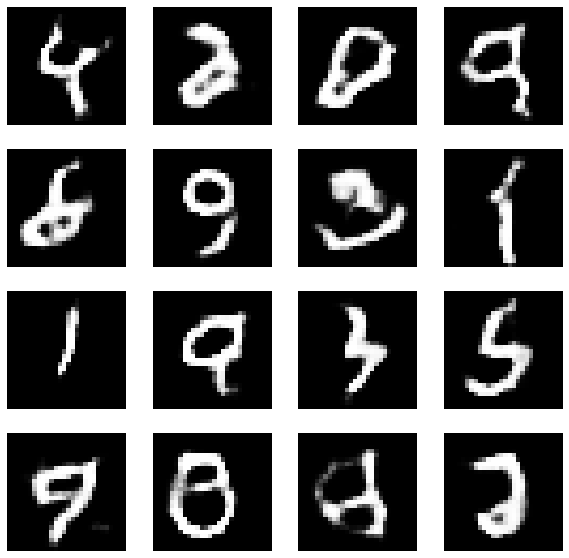

Época:  100


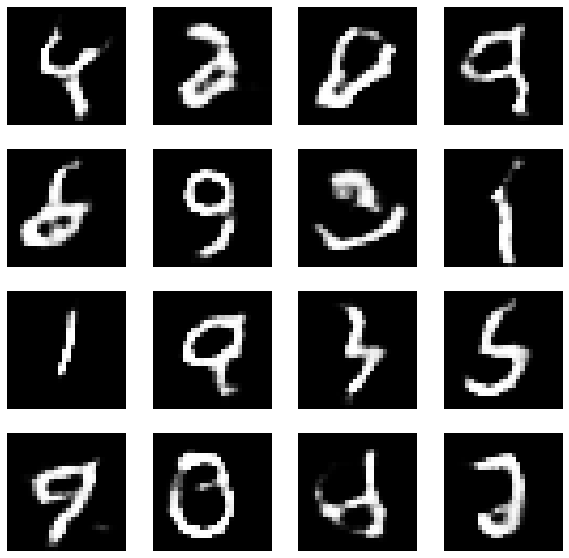

In [ ]:
treina_gan(X_treinamento, epocas, imagens_teste)